# <u>*Stock Price Prediction using Multiple Linear Regression*</u>

### *Problem Statement :* The objective of this project is to develop a predictive model using Multiple Linear Regression (MLR) to forecast the closing prices of shares of Amazon Inc. (AMZN) based on historical data.

### Importing Libraries

In [34]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import mplfinance as mpf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import learning_curve 

### Loading , Visualizing and Analyzing the Dataset

Raw data from Yahoo Finance : 
           Date        Open        High         Low       Close   Adj Close  \
0    2023-04-21  106.099998  108.150002  105.080002  106.959999  106.959999   
1    2023-04-24  107.660004  109.230003  105.070000  106.209999  106.209999   
2    2023-04-25  104.910004  105.449997  102.449997  102.570000  102.570000   
3    2023-04-26  105.040001  106.620003  104.099998  104.980003  104.980003   
4    2023-04-27  108.160004  110.860001  106.800003  109.820000  109.820000   
..          ...         ...         ...         ...         ...         ...   
246  2024-04-15  187.429993  188.690002  183.000000  183.619995  183.619995   
247  2024-04-16  183.270004  184.830002  182.259995  183.320007  183.320007   
248  2024-04-17  184.309998  184.570007  179.820007  181.279999  181.279999   
249  2024-04-18  181.470001  182.389999  178.649994  179.220001  179.220001   
250  2024-04-19  178.740005  179.000000  173.440002  174.630005  174.630005   

        Volume  
0  

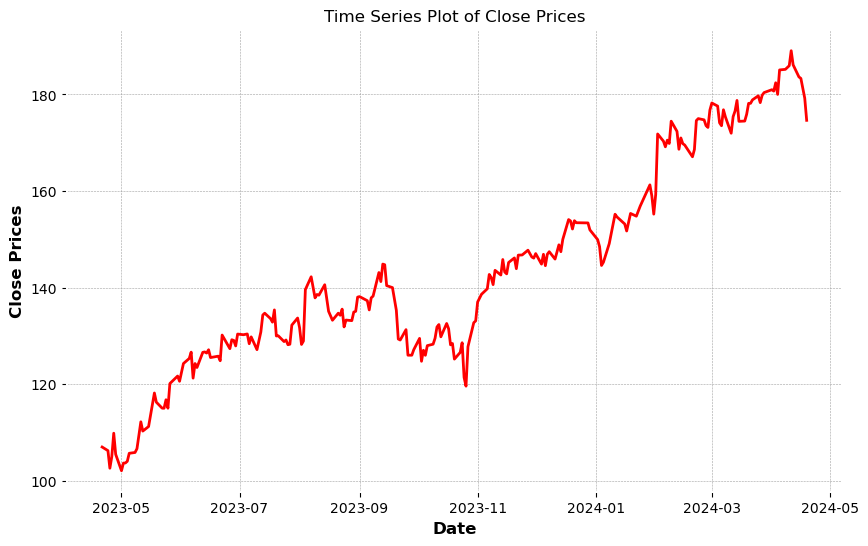

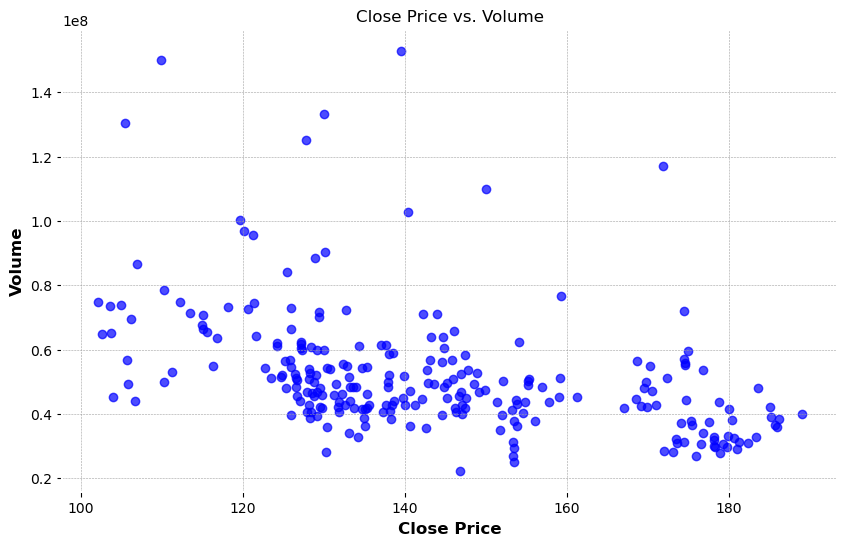

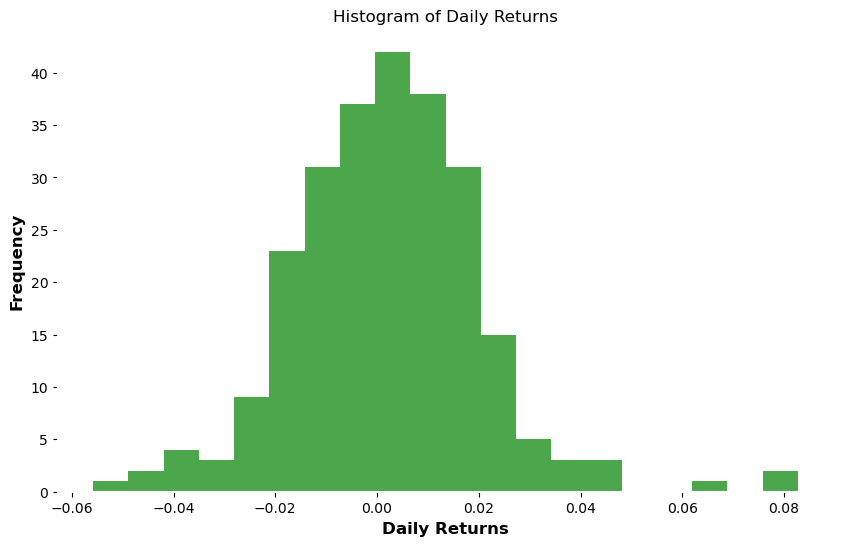

Mean return: 0.002132191612441272
Median return: 0.001207359327410673
Standard deviation of returns: 0.018514108042759943
Skewness of returns: 0.5144535383306428
Kurtosis of returns: 2.663263677375387


In [36]:
#Import the data
data = pd.read_csv("AMZN (1).csv")
print('Raw data from Yahoo Finance : ')
print(data)

# Convert the date column to datetime if it's not already in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plot the time series plot of close prices
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], color='red', linestyle='-')
plt.title('Time Series Plot of Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.grid(True)
plt.show()

# Plot close price versus volume
plt.figure(figsize=(10, 6))
plt.scatter(data['Close'], data['Volume'], color='blue', alpha=0.7)
plt.title('Close Price vs. Volume')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# Set the date column as the index
data.set_index('Date', inplace=True)

# Compute daily returns
data['Daily Returns'] = data['Close'].pct_change()

# Plot histogram of daily returns distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Daily Returns'].dropna(), bins=20, color='green', alpha=0.7)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Calculate summary statistics
mean_return = data['Daily Returns'].mean()
median_return = data['Daily Returns'].median()
std_deviation = data['Daily Returns'].std()
skewness = data['Daily Returns'].skew()
kurtosis = data['Daily Returns'].kurtosis()

print("Mean return:", mean_return)
print("Median return:", median_return)
print("Standard deviation of returns:", std_deviation)
print("Skewness of returns:", skewness)
print("Kurtosis of returns:", kurtosis)

### Candlestick Chart

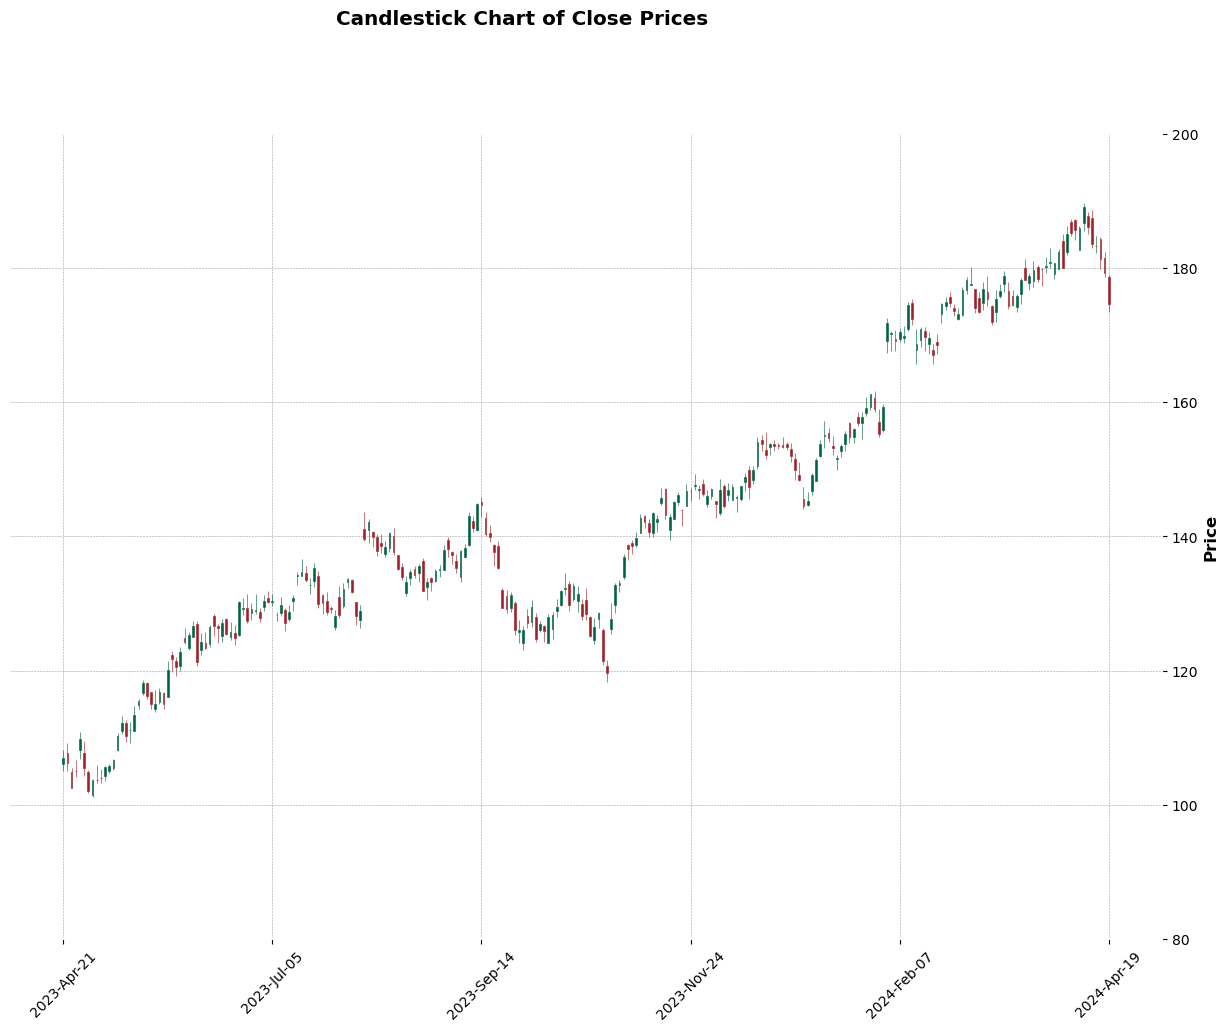

In [37]:
# Plot the candlestick chart
mpf.plot(data, type='candle', style='charles', ylabel='Price', title='Candlestick Chart of Close Prices', ylim=(80, 200),fill_between=True,figscale=2)

### Viewing Data Attributes (Descriptive Statistics, Missing Values,etc.)

In [38]:
data = data.drop(['Adj Close','Daily Returns'],axis=1)
print(data.info())
print('\nSummary Statistics : ')
print(data.describe())
# Check for missing values
missing_values = data.isnull().sum()

# Print the count of missing values for each column
print("\nMissing values in the dataset:")
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-04-21 to 2024-04-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    251 non-null    float64
 1   High    251 non-null    float64
 2   Low     251 non-null    float64
 3   Close   251 non-null    float64
 4   Volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB
None

Summary Statistics : 
             Open        High         Low       Close        Volume
count  251.000000  251.000000  251.000000  251.000000  2.510000e+02
mean   143.140677  144.720836  141.638925  143.231952  5.214624e+07
std     21.438861   21.440810   21.355853   21.432737  1.957819e+07
min    101.470001  103.900002  101.150002  102.050003  2.237840e+07
25%    128.610001  130.055000  126.959999  128.309998  4.141355e+07
50%    138.990005  140.410004  137.449997  138.559998  4.826000e+07
75%    155.214996  156.630005  153.914993  155.189995  5.769340

## Model Development

### Developing the Predictive Model using MLR

In [39]:
# Define predictors (features) and response variable
X = data.drop('Close', axis=1)
y = data['Close']

# Add constant to predictors matrix for intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the OLS regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.801e+04
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:45:22   Log-Likelihood:                -288.94
No. Observations:                 251   AIC:                             587.9
Df Residuals:                     246   BIC:                             605.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1312      0.449      0.292      0.7

### Checking for multicollinearity in the predictor variables of the data


Correlation Matrix:
        const      Open      High       Low    Volume
const     NaN       NaN       NaN       NaN       NaN
Open      NaN  1.000000  0.998585  0.998467 -0.436127
High      NaN  0.998585  1.000000  0.998930 -0.426088
Low       NaN  0.998467  0.998930  1.000000 -0.444851
Volume    NaN -0.436127 -0.426088 -0.444851  1.000000


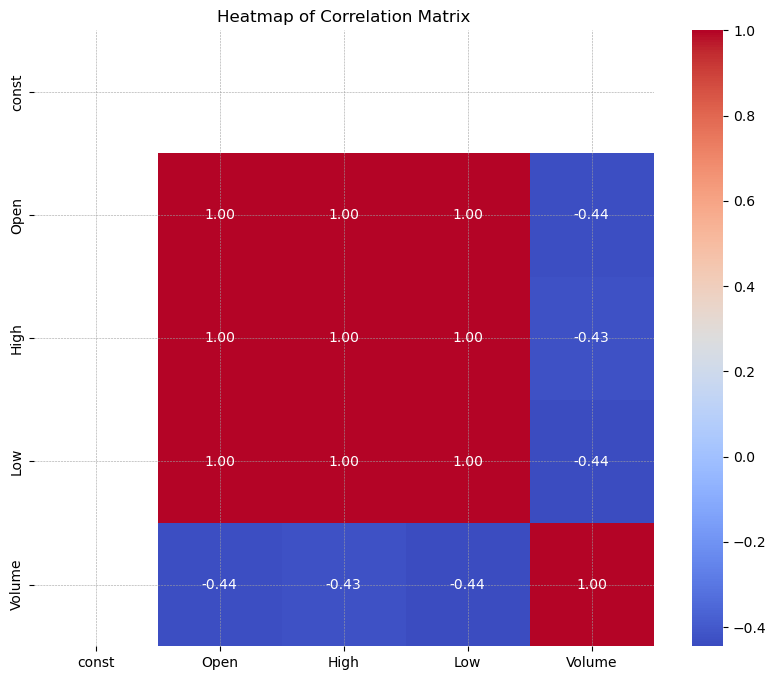

  Features         VIF
0    const   84.618805
1     Open  417.003229
2     High  721.831546
3      Low  664.225845
4   Volume    1.552830


In [40]:
# Print the correlation matrix
corr_matrix=X.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF dataframe
print(vif)

### Performing PCA to remove high multicollinearity present in the predictor variables

In [41]:
# Standardize the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

# Print the cumulative explained variance ratio
cumulative_explained_variance_ratio = explained_variance_ratio.cumsum()
print("\nCumulative Explained Variance Ratio:")
for i, ratio in enumerate(cumulative_explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")


Explained Variance Ratio:
PC1: 0.8126
PC2: 0.1868
PC3: 0.0004
PC4: 0.0002
PC5: 0.0000

Cumulative Explained Variance Ratio:
PC1: 0.8126
PC2: 0.9994
PC3: 0.9998
PC4: 1.0000
PC5: 1.0000


### Developing MLR Model using the Principal Components

In [42]:
# Perform PCA
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)

# Add constant to predictors matrix for intercept
X_train = sm.add_constant(X_train)

# Fit the OLS model on the training data
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the OLS regression
print(model.summary())

y_pred = model.predict(sm.add_constant(X_test))
# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print a line
print("=" * 50)

# Print MSE and RMSE
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.609e+04
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          1.60e-227
Time:                        16:45:34   Log-Likelihood:                -309.87
No. Observations:                 188   AIC:                             625.7
Df Residuals:                     185   BIC:                             635.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        143.2552      0.093   1548.675      0.0

### Checking for overfitting of the model

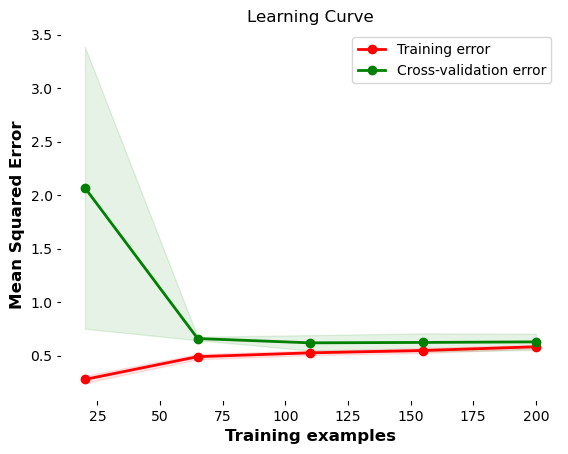

In [43]:
# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring='neg_mean_squared_error')
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation error")

    plt.legend(loc="best")
    return plt

# Plot learning curve
plot_learning_curve(LinearRegression(), "Learning Curve", X, y, cv=5, n_jobs=-1)
plt.show()


## Model Accuracy Check (Diagrams)

### Actual vs Predicted Values

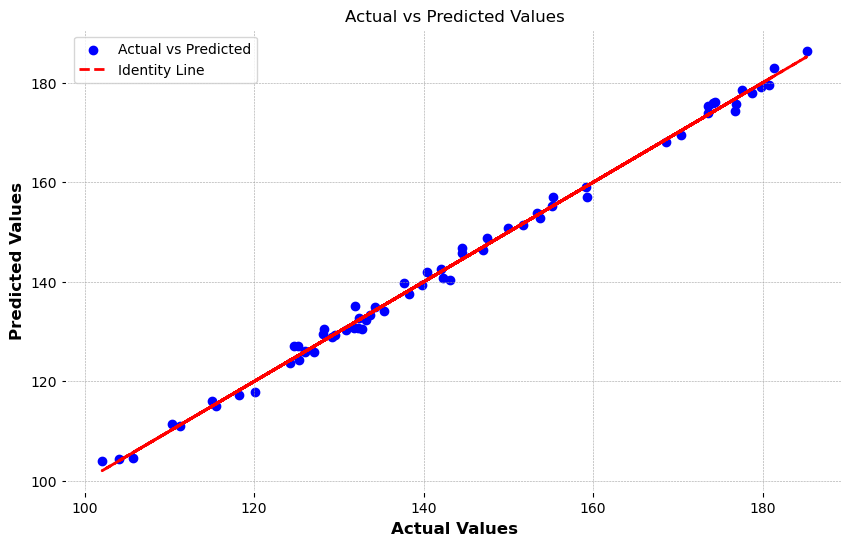

In [44]:
# Get predicted values
predicted_values = model.predict(sm.add_constant(X_test))

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_values, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Identity Line')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

### Residual Plot for checking Homoscedasticity

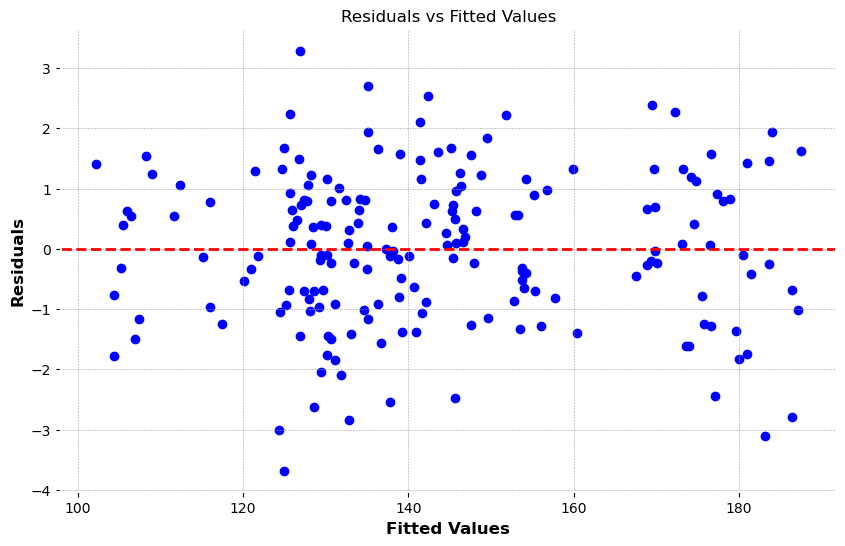

In [45]:
# Extract residuals
residuals = model.resid

# Residuals vs Fitted plot
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals, color='blue')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()

### Checking if the error in prediction is a weakly stationary series (white noise)

In [46]:
residuals = model.resid

# Perform Augmented Dickey-Fuller (ADF) test on the residuals
adf_result = adfuller(residuals)

# Print the ADF test results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

# Interpret the test result
if adf_result[1] < 0.05:
    print("Reject the null hypothesis (H0), thus, The error in the time series is weakly stationary.")
else:
    print("Fail to reject the null hypothesis (H0),thus, The error in the time series is non-stationary.")

ADF Statistic: -6.693490045005958
p-value: 4.053962097074685e-09
Reject the null hypothesis (H0), thus, The error in the time series is weakly stationary.


### Checking Normality of Residuals

<Figure size 800x600 with 0 Axes>

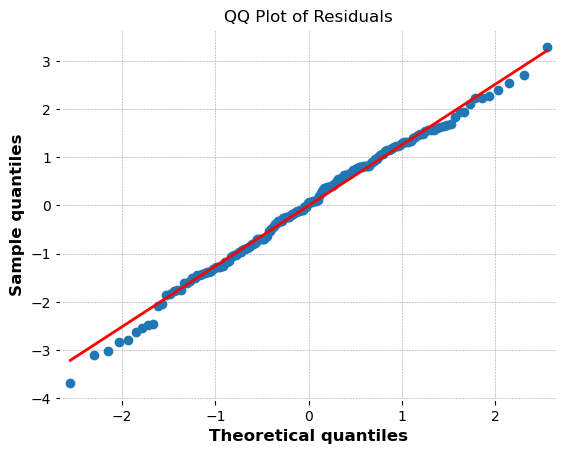

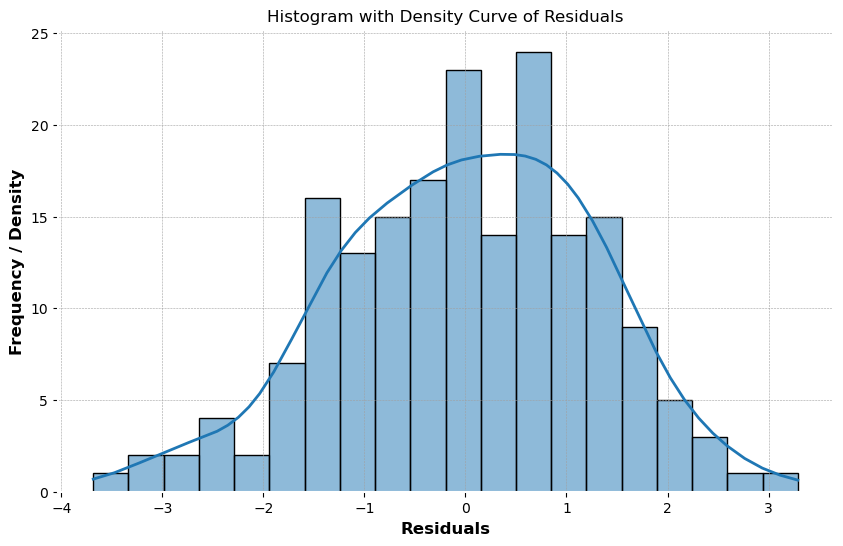

In [47]:
# QQ plot
plt.figure(figsize=(8, 6))
qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.grid(True)
plt.show()

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot histogram of residuals with density curve
sns.histplot(residuals, bins=20, kde=True)

# Set titles and labels
plt.title('Histogram with Density Curve of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency / Density')

# Show the plot
plt.show()
